In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import pandas as pd
import numpy as np
import nltk

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
from wordcloud import WordCloud
import re
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import PunktSentenceTokenizer
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import STOPWORDS

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [57]:
data = pd.read_csv('/content/drive/My Drive/twitter/train.csv')
test = pd.read_csv('/content/drive/My Drive/twitter/test.csv')

In [58]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [59]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


No non-null entry !!

In [61]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


In [63]:
data['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [64]:
data['label'].dropna(inplace=True)

In [65]:
blanks = []
for i, ide, label, tw in data.itertuples():
    if type(tw) == str:
        if tw.isspace():
            blanks.append(i)

In [66]:
blanks

[]

list is empty means no tweets are blank !

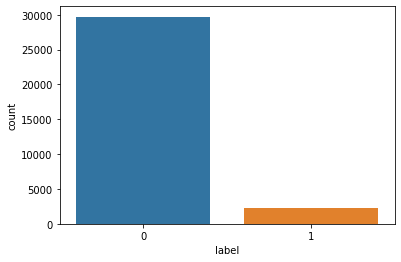

In [67]:
sns.countplot(x='label', data=data)

In [68]:
def gene_word_freq(tweet):
    word = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in tweet.split():
        word.extend(tw_words)
    word_freq = pd.Series(word).value_counts()
    
    return word_freq

gene_word_freq(data.tweet.str)

@user                               17291
the                                 10065
to                                   9768
a                                    6261
i                                    5655
                                    ...  
rosemond:                               1
psu                                     1
#toptots                                1
#quietpeoplearealwaysthoughtweak        1
#poor;                                  1
Length: 67223, dtype: int64

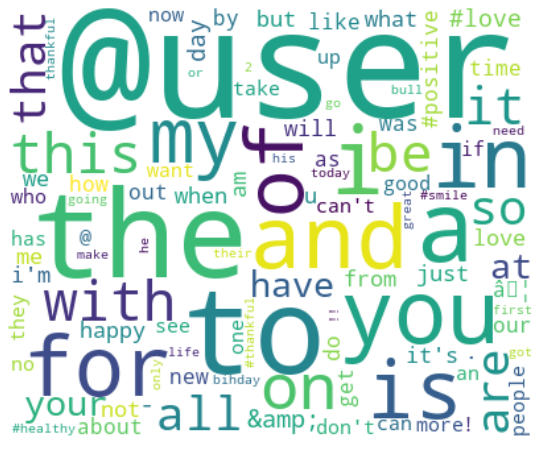

In [69]:
word_freq = gene_word_freq(data.tweet.str)

wc = WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [70]:
def clean_text1(tweet):
    
    tweet = re.sub(r"http\S+", "", tweet)        #removes URLS
    #tweet = re.sub(r"@[^\s]+[\s]?",'',tweet)     #removes twitter handle usernames
    tweet = re.sub('[^ @#a-zA-Z0-9]', '', tweet)   #removes all non alphanumerics
    ##tweet = re.sub(r'[?!.;:,#@-]', '', tweet)    
    #tweet = re.sub('[0-9]', '', tweet)           #removes numbers

    ##Convert to lowercase to maintain consistency
    tweet = tweet.lower()
    return tweet

In [71]:
def clean_text2(tweet):
    tweet = re.sub(r"@[^\s]+[\s]?",'',tweet)     #removes twitter handle usernames
    tweet = re.sub('[0-9]', '', tweet)           #removes numbers
    return tweet

In [72]:
#returns the list of tuples, each tuple contains (word, its_tag(noun, pronoun etc))
def getTags(string):
    #tokenize the string to get the list of the words
    words = nltk.word_tokenize(string)
    #pass this list to get tags (list of tuples)
    tags = nltk.pos_tag(words)
    return tags

In [73]:
#returns the tags of multiple sentences in a single list
def getTags_tweet(sents):
    tags = []
    for sent in sents:
        #remove '@' temporarily for correct analysis of words, should we also remove'#' ?
        sent = re.sub('@', '', sent)
        #concat to the list
        tags.extend(getTags(sent))
    return tags

In [74]:
#get wordnet-tags from nltk-tags
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return 'n'

In [75]:
lm = WordNetLemmatizer()
#clean tweet and the tags of all words in it are passed
#some words are there in tags but not in clean tweet, because they are deleted while cleaning eg. numbers & @user
def lemma(string, tags):
    #lemmatized string
    res = ''
    words = string.split()
    i = 0;
    for word in words:
        h = ''
        #remove hashtag for lemmatization
        if(word[0]=='#'):
            word = word[1:]
            h='#' #to insert it back in the string

        #words in tags are in the sequence in which they were in the clean tweet before cleaning
        #hence no need to start the loop from 0 every time
        while i < len(tags):
            tag = tags[i]
            if tag[0]==word:
                res = res+' '+h+lm.lemmatize(word, pos=get_wordnet_pos(tag[1]))
                i = i + 1
                break
            i = i + 1
    return res

In [76]:
def preprocess(data):
    #clean_text_1 retains the number and @user to keep the meaning of sentence intact, which is necessary for correct guessing of tags
    data['clean tweet']=data['tweet'].apply(clean_text1)
    #to tokenize the sentences in the document, here doc=tweet
    pst = PunktSentenceTokenizer() #using pretrained model
    #.tokenize() return the list of tokenized sentences/strings; if tweet contains only 1 sentence, list will also have only 1 element
    data['sent'] = data['clean tweet'].apply(lambda x: pst.tokenize(x))
    #now tags of each word from each sentence are listed in tags column as list of tuples(word, its_tag)
    data['tags']=data['sent'].apply(getTags_tweet)
    #as tags are ready, we can complete remaining part of the clean_text, i.e. removing numbers and @user
    data['clean tweet'] = data['clean tweet'].apply(clean_text2)
    #drop the list_of_sentences column as it is not necessary
    data.drop('sent', axis = 1, inplace=True)
    #for each tweet, lemmatize the words in the clean tweet, by using the appropriate tag from the 'tags' column
    for i in range(len(data)):
        data.iloc[i, 3]=lemma(data.iloc[i, 3], data.iloc[i, 4])
    #remove the stopwords from clean tweet; better replacement to removing words with no_of_letters < 4
    data['clean tweet']=data['clean tweet'].apply(lambda x : ' '.join([word for word in x.split() if word not in STOPWORDS]))
    return data

In [77]:
data = preprocess(data)

In [78]:
data.head()

,id,label,tweet,clean tweet,tags
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...,"[(user, NN), (when, WRB), (a, DT), (father, NN..."
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cant use cause dont offer ...,"[(user, RB), (user, JJ), (thanks, NNS), (for, ..."
2,3,0,bihday your majesty,bihday majesty,"[(bihday, RB), (your, PRP$), (majesty, NN)]"
3,4,0,#model i love u take with u all the time in ...,#model love u take u time ur,"[(#, #), (model, NN), (i, NN), (love, VBP), (u..."
4,5,0,factsguide: society now #motivation,factsguide society now #motivation,"[(factsguide, JJ), (society, NN), (now, RB), (..."


In [79]:
X=data['clean tweet']
Y=data['label']

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

# TF-IDF Features
TF-IDF works by penalizing the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.



It is the logarithmically scaled inverse fraction of the document that contains the word(obtained by dividing the total number of documents containing the term, and then taking the logaritm of that quotient)


In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
tfidf_vect = tfidf.fit_transform(X_train)
tfidf_test_vectors=tfidf.transform(X_test)
tfidf_vect


<25569x27924 sparse matrix of type '<class 'numpy.float64'>'
	with 171955 stored elements in Compressed Sparse Row format>

# WEEK **3**
##Apply ML/DL algorithms, evaluate and compare their performances

In [82]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB().fit(tfidf_vect,Y_train)
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
predicted=clf.predict(tfidf_test_vectors)
print(accuracy_score(Y_test,predicted))
print(f1_score(Y_test,predicted))
print(classification_report(Y_test,predicted))

0.9402471453151885
0.24803149606299213
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5948
           1       1.00      0.14      0.25       445

    accuracy                           0.94      6393
   macro avg       0.97      0.57      0.61      6393
weighted avg       0.94      0.94      0.92      6393



Importing all Algorithms which are needed


In [83]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression



#MODELS

1.Logistic Regression

2.Decision tree

3.KNeighbors

4.LinearSVC

5.SGD

6.Random Forest

7.Gradient Boosting

8.Extra Trees

9.Bagging

10.AdaBoost

In [84]:
models = []
models.append(('LR', LogisticRegression())) #tuple consists of model-name and the object of the model-clas
models.append(('DT', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', LinearSVC()))
models.append(('SGD', SGDClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('ET', ExtraTreesClassifier()))
models.append(('BG', BaggingClassifier()))
models.append(('AB', AdaBoostClassifier()))

#Stratified K-Folds cross-validator
This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.
Given data is highly imbalanced.
Used this to ensure that equall proportion ofboth classes inn each fold.

The evaluation is performed based on the F1 scores 

Precision = TP/TP+FP

Recall = TP/TP+FN

F1 Score = 2(Recall*Precision) / (Recall + Precision)



In [85]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer

def classification_report_with_f1_score(y_true, y_pred):
    print(classification_report(y_true, y_pred)) # print classification report
    return f1_score(y_true, y_pred) # return f1 score

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
scoring = make_scorer(classification_report_with_f1_score)
results = []
names = []

for name, model in models:
    clf = make_pipeline(TfidfVectorizer(), model)
    cv_result = cross_val_score(clf, X, Y, scoring=scoring, cv=kfold)
    results.append(cv_result)
    names.append(name)
    print('mean f1 score: %f STD: %f %s' %(cv_result.mean(), cv_result.std(), name))

    #model.fit(tfidf_vect, Y_train)
    #predicted=model.predict(tfidf_test_vectors)
    #print(name)
    #print(accuracy_score(Y_test,predicted))
    #print(f1_score(Y_test,predicted))
    #print(classification_report(Y_test,predicted))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5944
           1       0.88      0.29      0.43       449

    accuracy                           0.95      6393
   macro avg       0.91      0.64      0.70      6393
weighted avg       0.94      0.95      0.93      6393

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5944
           1       0.93      0.30      0.46       449

    accuracy                           0.95      6393
   macro avg       0.94      0.65      0.72      6393
weighted avg       0.95      0.95      0.94      6393

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5944
           1       0.91      0.29      0.44       448

    accuracy                           0.95      6392
   macro avg       0.93      0.64      0.71      6392
weighted avg       0.95      0.95      0.94      6392

              preci

Classificaton_report of each fold for each model is printed

Mean F1 score was best for SVC and ET

Recall for class 1 is of our interest ,that was max for SVC and ET

#Week **4**
##fine tuning parameters

In [86]:

from sklearn.svm import SVC
print("Before hyperparameter tuning")
#SVC Without hyperparameter tuning 
clf=SVC().fit(tfidf_vect,Y_train)
predicted=clf.predict(tfidf_test_vectors)
print('accuracy:',accuracy_score(Y_test,predicted))
print('f1_score:',f1_score(Y_test,predicted))
print(classification_report(Y_test,predicted))


Before hyperparameter tuning
accuracy: 0.9563585171281088
f1_score: 0.5660964230171073
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5948
           1       0.92      0.41      0.57       445

    accuracy                           0.96      6393
   macro avg       0.94      0.70      0.77      6393
weighted avg       0.95      0.96      0.95      6393



##Performing gridsearchcv to find the best hyperparameters

In [87]:
#Performing grid search cv
#the following code is commented because it consumes a lot of time to find the best parameters
#from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
#param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              #'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              #'kernel': ['rbf']}  
  
#grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
#grid.fit(tfidf_vect,Y_train)
# print best parameter after tuning 
#print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
#print(grid.best_estimator_) 
#grid_predictions = grid.predict(tfidf_test_vectors) 
  
#After tuning
print("After hyperparameter tuning")
clf=SVC(C= 10, gamma= 0.1, kernel = 'rbf',class_weight='balanced').fit(tfidf_vect,Y_train)
predicted=clf.predict(tfidf_test_vectors)
print('accuracy:',accuracy_score(Y_test,predicted))
print('f1_score:',f1_score(Y_test,predicted))
print(classification_report(Y_test,predicted))

After hyperparameter tuning
accuracy: 0.9583919912404192
f1_score: 0.6956521739130435
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5948
           1       0.71      0.68      0.70       445

    accuracy                           0.96      6393
   macro avg       0.84      0.83      0.84      6393
weighted avg       0.96      0.96      0.96      6393



##As the data is immbalanced perform SMOTE technique

In [88]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from imblearn.pipeline import make_pipeline
#from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

def classification_report_with_f1_score(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict = True) # print classification report
    f1 = f1_score(y_true, y_pred)
    l = [report['1']['recall'], f1]
    print(l)
    return f1 # return f1 score

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
scoring = make_scorer(classification_report_with_f1_score)

In [89]:
results = []
names = []

for name, model in models:
    clf = make_pipeline(TfidfVectorizer(), smote, model)
    cv_result = cross_val_score(clf, X, Y, scoring=scoring, cv=kfold)
    results.append(cv_result)
    names.append(name)
    print('mean f1 score : %f STD: %f %s' %(cv_result.mean(), cv_result.std(), name))

    #model.fit(tfidf_vect, Y_train)
    #predicted=model.predict(tfidf_test_vectors)
    #print(name)
    #print(accuracy_score(Y_test,predicted))
    #print(f1_score(Y_test,predicted))
    #print(classification_report(Y_test,predicted))


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.7928730512249443, 0.49582172701949856]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.8240534521158129, 0.5146036161335188]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.8080357142857143, 0.5031271716469771]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.8080357142857143, 0.5006915629322268]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.8191964285714286, 0.5090152565880721]
mean f1 score : 0.504652 STD: 0.006543 LR


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.576837416481069, 0.5624321389793702]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.6102449888641426, 0.5937161430119177]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.5959821428571429, 0.6027088036117382]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.6071428571428571, 0.5978021978021978]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.5892857142857143, 0.5979614949037372]
mean f1 score : 0.590924 STD: 0.014528 DT


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.9621380846325167, 0.1664739884393064]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.955456570155902, 0.16673144189661873]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.9732142857142857, 0.16968281766880716]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.96875, 0.16750289463527596]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.9821428571428571, 0.16194331983805668]
mean f1 score : 0.166467 STD: 0.002528 KNN


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.7371937639198218, 0.5229067930489731]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.7683741648106904, 0.5361305361305362]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.7611607142857143, 0.5299145299145299]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.75, 0.5201238390092878]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.7678571428571429, 0.5267993874425727]
mean f1 score : 0.527175 STD: 0.005582 SVC


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.799554565701559, 0.44184615384615383]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.8329621380846325, 0.44844124700239807]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.8035714285714286, 0.43609933373712906]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.8236607142857143, 0.4429771908763506]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.8348214285714286, 0.4487102579484104]
mean f1 score : 0.443615 STD: 0.004675 SGD


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.5991091314031181, 0.6450839328537171]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.6080178173719376, 0.6650426309378806]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.578125, 0.6507537688442211]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.5892857142857143, 0.6400000000000001]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.5982142857142857, 0.6576687116564417]
mean f1 score : 0.651710 STD: 0.008891 RF


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.576837416481069, 0.5149105367793241]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.5835189309576837, 0.5515789473684212]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.5892857142857143, 0.5523012552301254]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.5669642857142857, 0.522633744855967]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.5736607142857143, 0.5181451612903226]
mean f1 score : 0.531914 STD: 0.016536 GB


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.6481069042316259, 0.6855123674911662]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.6681514476614699, 0.7075471698113208]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.6361607142857143, 0.691747572815534]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.6629464285714286, 0.6867052023121387]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.6607142857142857, 0.703923900118906]
mean f1 score : 0.695087 STD: 0.009016 ET


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.5924276169265034, 0.5859030837004405]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.643652561247216, 0.64293659621802]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.6205357142857143, 0.6289592760180995]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.6138392857142857, 0.5939524838012958]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.5982142857142857, 0.6063348416289592]
mean f1 score : 0.611617 STD: 0.021367 BG


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.5233853006681515, 0.4791029561671764]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.9064587973273942, 0.22095548317046687]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.9084821428571429, 0.22350356946732564]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.8883928571428571, 0.21334762798177434]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.8995535714285714, 0.20978656949505464]
mean f1 score : 0.269339 STD: 0.104999 AB


###Mean F1 score was best for SVC and ET

###Recall for class 1 is of our interest ,that was max for SVC and ET

In [92]:
svc = make_pipeline(TfidfVectorizer(), SVC(C=10, gamma=0.1, random_state=0, class_weight='balanced'))
cv_result = cross_val_score(svc, X, Y, scoring=scoring, cv=kfold)
print('mean f1 score : %f STD: %f' %(cv_result.mean(), cv_result.std()))

[0.6614699331848553, 0.6651735722284434]
[0.7216035634743875, 0.7305524239007892]
[0.6941964285714286, 0.7020316027088037]
[0.6495535714285714, 0.6598639455782314]
[0.6897321428571429, 0.7022727272727274]
mean f1 score : 0.691979 STD: 0.026248


In [93]:
et = make_pipeline(TfidfVectorizer(), smote, ExtraTreesClassifier(class_weight='balanced', random_state=0))
cv_result = cross_val_score(et, X, Y, scoring=scoring, cv=kfold)
print('mean f1 score : %f STD: %f' %(cv_result.mean(), cv_result.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.6614699331848553, 0.6931155192532089]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.6726057906458798, 0.709753231492362]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.6205357142857143, 0.6763990267639903]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.6517857142857143, 0.6774941995359628]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.6517857142857143, 0.6994011976047904]
mean f1 score : 0.691233 STD: 0.012822
